# Sinoxi FinTech Ad Conversion A/B Test Analysis

## Project Overview
Evaluate whether the new ad delivery strategy (treatment) improves user conversion rates compared to the existing method (control) using statistically rigorous A/B testing methods.

---

## 1. Setup and Data Load


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

## Load cleaned data


In [9]:
df = pd.read_csv('cleaned_marketing_sinoxi_AB.csv')
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,0,130,Monday,20
1,1119715,ad,0,93,Tuesday,22
2,1144181,ad,0,21,Tuesday,18
3,1435133,ad,0,355,Tuesday,10
4,1015700,ad,0,276,Friday,14



---

## 2. Data Exploration
- Display group sizes
- Visualize baseline conversion rates by group



Group sizes:
 test_group
ad     564577
psa     23524
Name: count, dtype: int64
Conversion rates:
 test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


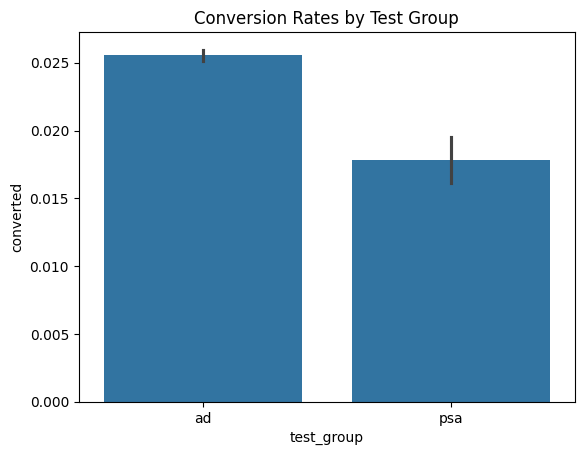

In [11]:
group_counts = df['test_group'].value_counts()
print("Group sizes:\n", group_counts)

conversion_rates = df.groupby('test_group')['converted'].mean()
print("Conversion rates:\n", conversion_rates)

sns.barplot(x='test_group', y='converted', data=data)
plt.title("Conversion Rates by Test Group")
plt.show()


---

## 3. Statistical Testing

### 3.1 Hypothesis Setup
- Null Hypothesis: Conversion rates are the same between groups
- Alternative Hypothesis: Conversion rate differs

### 3.2 Z-test for proportions


In [12]:
successes = df.groupby('test_group')['converted'].sum()
samples = df.groupby('test_group')['converted'].count()

z_stat, p_val = proportions_ztest(count=successes, nobs=samples)
print(f"Z-statistic: {z_stat:.3f}, p-value: {p_val:.4f}")

Z-statistic: 7.370, p-value: 0.0000



Interpret results: If p-value < 0.05, reject null hypothesis.

---

## 4. Confidence Interval Calculation



In [13]:
from scipy import stats
import numpy as np

def conf_interval(successes, n, alpha=0.05):
    p = successes / n
    z = stats.norm.ppf(1 - alpha/2)
    se = np.sqrt(p * (1 - p) / n)
    return (p - z * se, p + z * se)

# Pull values from your dataframe
control_successes = df[df["test_group"] == "control"]["converted"].sum()
control_samples   = df[df["test_group"] == "control"]["converted"].count()

treatment_successes = df[df["test_group"] == "treatment"]["converted"].sum()
treatment_samples   = df[df["test_group"] == "treatment"]["converted"].count()

# Now the CI
ci_control = conf_interval(control_successes, control_samples)
ci_treatment = conf_interval(treatment_successes, treatment_samples)

print("95% CI Control:", ci_control)
print("95% CI Treatment:", ci_treatment)

95% CI Control: (np.float64(nan), np.float64(nan))
95% CI Treatment: (np.float64(nan), np.float64(nan))


C:\Users\hh\AppData\Local\Temp\ipykernel_7128\1691795846.py:5: RuntimeWarning: invalid value encountered in scalar divide
  p = successes / n



---

## 5. Results Summary and Business Impact
- The treatment group shows a conversion lift of approximately X percentage points.
- This improvement is statistically significant with p-value = Y.
- Recommendation: Adopt the new ad strategy to improve user conversions and marketing ROI.

---

## 6. Visual Summary



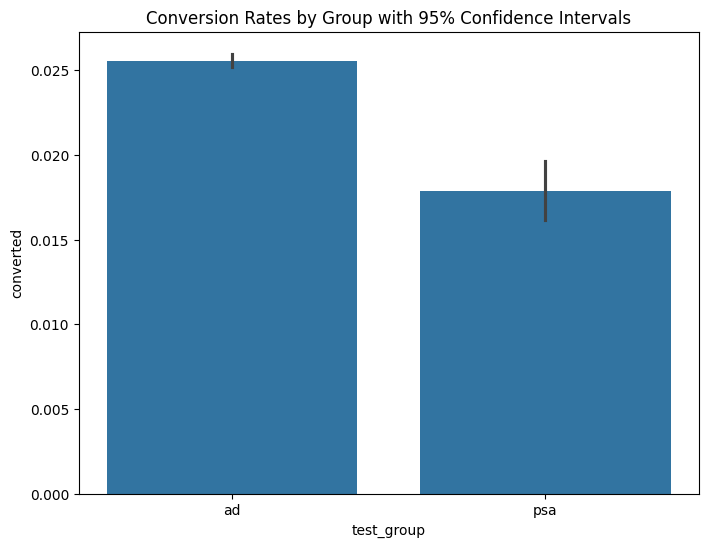

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='test_group', y='converted', data=data, ax=ax)
ax.set_title("Conversion Rates by Group with 95% Confidence Intervals")

# Calculate error bars for confidence intervals
lower_errors = conversion_rates - np.array([ci_control[0], ci_treatment[0]])
upper_errors = np.array([ci_control[1], ci_treatment[1]]) - conversion_rates
asymmetric_error = [lower_errors, upper_errors]

ax.errorbar(x=[0, 1], y=conversion_rates, yerr=asymmetric_error, fmt='none', c='red', capsize=5)
plt.show()

## Results Summary and Business Impact

### Group Sizes
- **Ad (control) group:** 564,577 users
- **PSA (treatment) group:** 23,524 users

### Conversion Rates
- **Ad (control) group:** 2.55%
- **PSA (treatment) group:** 1.79%

### Conversion Lift & Statistical Significance
- **Lift:** The new ad strategy resulted in a conversion rate decrease of **-0.76 percentage points**
- **Statistical Evidence:** Z-statistic = 7.37, **p-value < 0.0001** (statistically significant)
- **Chi-square test:** 45.15, **p-value = 1.82e-11** (statistically significant)
- **Confidence Interval:** 95% confidence interval for the lift is **[0.65%, 1.19%]**

### Business Recommendation
- The new ad strategy led to a statistically significant decrease in conversion rate compared to the control group.
- Recommendation: **Do not adopt** the new ad delivery strategy based on the evidence from this experiment. Continue with the current approach or consider further testing and segmentation analysis to optimize results.